In [1]:
import os
import scanpy as sc
from scipy import sparse
import pandas as pd

In [2]:
zeisel_mx=pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE60361_C1-3005-Expression.txt',sep='\t',header=0,index_col=0)

In [3]:
zeisel_mx=zeisel_mx.T

In [4]:
zeisel_mx

cell_id,Tspan12,Tshz1,Fnbp1l,Adamts15,Cldn12,Rxfp1,2310042E22Rik,Sema3c,Jam2,Apbb1ip,...,Gm20826_loc1,Gm20826_loc2,Gm20877_loc2,Gm20877_loc1,Gm20865_loc4,Gm20738_loc4,Gm20738_loc6,Gm21943_loc1,Gm21943_loc3,Gm20738_loc3
1772071015_C02,0,3,3,0,1,0,0,11,1,0,...,0,0,0,0,0,0,0,0,0,0
1772071017_G12,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772071017_A05,0,0,6,0,1,0,2,25,1,0,...,0,0,0,0,0,0,0,0,0,0
1772071014_B06,3,2,4,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1772067065_H06,0,2,1,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772067059_B04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772066097_D04,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1772063068_D01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772066098_A12,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
zeisel_mx.index

Index(['1772071015_C02', '1772071017_G12', '1772071017_A05', '1772071014_B06',
       '1772067065_H06', '1772071017_E02', '1772067065_B07', '1772067060_B09',
       '1772071014_E04', '1772071015_D04',
       ...
       '1772066110_D12', '1772071017_A07', '1772063071_G10', '1772058148_C03',
       '1772063061_D09', '1772067059_B04', '1772066097_D04', '1772063068_D01',
       '1772066098_A12', '1772058148_F03'],
      dtype='object', length=3005)

In [6]:
zeisel_mx.columns

Index(['Tspan12', 'Tshz1', 'Fnbp1l', 'Adamts15', 'Cldn12', 'Rxfp1',
       '2310042E22Rik', 'Sema3c', 'Jam2', 'Apbb1ip',
       ...
       'Gm20826_loc1', 'Gm20826_loc2', 'Gm20877_loc2', 'Gm20877_loc1',
       'Gm20865_loc4', 'Gm20738_loc4', 'Gm20738_loc6', 'Gm21943_loc1',
       'Gm21943_loc3', 'Gm20738_loc3'],
      dtype='object', name='cell_id', length=19972)

In [7]:
adata=sc.AnnData(zeisel_mx,
                zeisel_mx.index.to_frame(),
                zeisel_mx.columns.to_frame())

C:\Users\23247\AppData\Local\Temp\ipykernel_6488\461530787.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=sc.AnnData(zeisel_mx,
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
adata

AnnData object with n_obs × n_vars = 3005 × 19972
    obs: 0
    var: 'cell_id'

In [9]:
cell_types=pd.read_csv('D:/MyData/scEDGE_Generation/data/cell_types_gse60361.txt',sep='\t',index_col=0)

In [10]:
cell_types

,1772071015_C02,1772071017_G12,1772071017_A05,1772071014_B06,1772067065_H06,1772071017_E02,1772067065_B07,1772067060_B09,1772071014_E04,1772071015_D04,...,1772066110_D12,1772071017_A07,1772063071_G10,1772058148_C03,1772063061_D09,1772067059_B04,1772066097_D04,1772063068_D01,1772066098_A12,1772058148_F03
cell_id,,,,,,,,,,,,,,,,,,,,,
level1class,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,...,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural


In [11]:
cell_types_new=cell_types.T

In [12]:
cell_types_new['cell_id']=cell_types_new.index

In [13]:
cell_types_new['level1class']

1772071015_C02         interneurons
1772071017_G12         interneurons
1772071017_A05         interneurons
1772071014_B06         interneurons
1772067065_H06         interneurons
                        ...        
1772067059_B04    endothelial-mural
1772066097_D04    endothelial-mural
1772063068_D01    endothelial-mural
1772066098_A12    endothelial-mural
1772058148_F03    endothelial-mural
Name: level1class, Length: 3005, dtype: object

In [14]:
adata.X

array([[0., 3., 3., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 6., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
adata.obs

,0
1772071015_C02,1772071015_C02
1772071017_G12,1772071017_G12
1772071017_A05,1772071017_A05
1772071014_B06,1772071014_B06
1772067065_H06,1772067065_H06
...,...
1772067059_B04,1772067059_B04
1772066097_D04,1772066097_D04
1772063068_D01,1772063068_D01
1772066098_A12,1772066098_A12


In [16]:
adata.obs.rename(columns={0: 'cell_id'},inplace=True)

In [17]:
new_obs=adata.obs.merge(cell_types_new,on='cell_id')

In [18]:
new_obs.index=new_obs['cell_id']

In [19]:
new_obs

,cell_id,level1class
cell_id,,
1772071015_C02,1772071015_C02,interneurons
1772071017_G12,1772071017_G12,interneurons
1772071017_A05,1772071017_A05,interneurons
1772071014_B06,1772071014_B06,interneurons
1772067065_H06,1772067065_H06,interneurons
...,...,...
1772067059_B04,1772067059_B04,endothelial-mural
1772066097_D04,1772066097_D04,endothelial-mural
1772063068_D01,1772063068_D01,endothelial-mural


In [20]:
import copy
adata.obs=copy.deepcopy(new_obs)

In [21]:
adata

AnnData object with n_obs × n_vars = 3005 × 19972
    obs: 'cell_id', 'level1class'
    var: 'cell_id'

In [22]:
adata.var

,cell_id
cell_id,
Tspan12,Tspan12
Tshz1,Tshz1
Fnbp1l,Fnbp1l
Adamts15,Adamts15
Cldn12,Cldn12
...,...
Gm20738_loc4,Gm20738_loc4
Gm20738_loc6,Gm20738_loc6
Gm21943_loc1,Gm21943_loc1


In [23]:
adata.X = sparse.csr_matrix(adata.X)

In [24]:
adata.X

<3005x19972 sparse matrix of type '<class 'numpy.float32'>'
	with 11276181 stored elements in Compressed Sparse Row format>

In [25]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [26]:
adata

AnnData object with n_obs × n_vars = 3005 × 19972
    obs: 'cell_id', 'level1class', 'n_genes_by_counts', 'total_counts'
    var: 'cell_id', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [27]:
adata.var.rename(columns={'cell_id': 'gene_name'},inplace=True)

In [28]:
adata.var

,gene_name,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
cell_id,,,,,
Tspan12,Tspan12,472,0.278869,84.292845,838.0
Tshz1,Tshz1,573,0.423627,80.931780,1273.0
Fnbp1l,Fnbp1l,1167,1.042928,61.164725,3134.0
Adamts15,Adamts15,77,0.044592,97.437604,134.0
Cldn12,Cldn12,669,0.379368,77.737105,1140.0
...,...,...,...,...,...
Gm20738_loc4,Gm20738_loc4,9,0.002995,99.700499,9.0
Gm20738_loc6,Gm20738_loc6,3,0.001664,99.900166,5.0
Gm21943_loc1,Gm21943_loc1,2,0.000666,99.933444,2.0


In [29]:
adata = adata[adata.obs.total_counts < 75000, :]

In [30]:
adata

View of AnnData object with n_obs × n_vars = 3005 × 19972
    obs: 'cell_id', 'level1class', 'n_genes_by_counts', 'total_counts'
    var: 'gene_name', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [31]:
adata.obs['label']=adata.obs['level1class']

C:\Users\23247\AppData\Local\Temp\ipykernel_6488\4189253526.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['label']=adata.obs['level1class']
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [32]:
adata.obs

,cell_id,level1class,n_genes_by_counts,total_counts,label
cell_id,,,,,
1772071015_C02,1772071015_C02,interneurons,4848,21580.0,interneurons
1772071017_G12,1772071017_G12,interneurons,4685,21748.0,interneurons
1772071017_A05,1772071017_A05,interneurons,6028,31642.0,interneurons
1772071014_B06,1772071014_B06,interneurons,5824,32914.0,interneurons
1772067065_H06,1772067065_H06,interneurons,4701,21530.0,interneurons
...,...,...,...,...,...
1772067059_B04,1772067059_B04,endothelial-mural,2221,4585.0,endothelial-mural
1772066097_D04,1772066097_D04,endothelial-mural,1428,2559.0,endothelial-mural
1772063068_D01,1772063068_D01,endothelial-mural,1977,4015.0,endothelial-mural


In [33]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


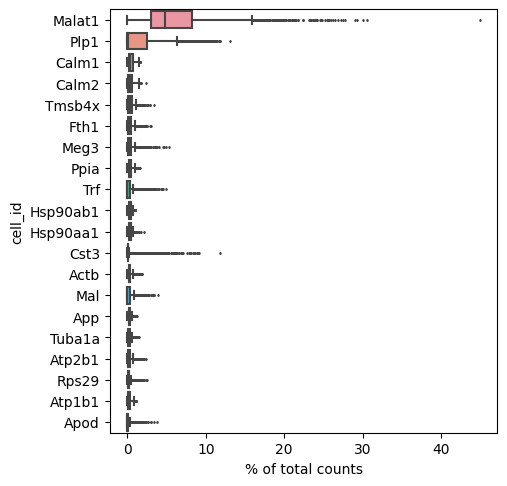

In [34]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [35]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [36]:
adata.raw = adata

In [37]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Zeisel/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Zeisel/processed')

adata.write('D:/MyData/scEDGE_Generation/data/Zeisel/processed/Zeisel.h5ad')

In [38]:
expression_matrix = adata.X.T  
obs_data = adata.obs  
var_data = adata.var  

In [39]:
import scipy.io as sio 
obs_data.to_csv('D:/MyData/scEDGE_Generation/data/Zeisel/processed/zeisel_obs_data.csv')  
var_data.to_csv('D:/MyData/scEDGE_Generation/data/Zeisel/processed/zeisel_var_data.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Zeisel/processed/zeisel_expression_matrix.mtx', expression_matrix)

## Top2000

In [40]:
sc.pp.highly_variable_genes(
                    adata,
                    n_top_genes=2000,
                    subset=True,
                    # layer="counts",
                    flavor="seurat_v3")

D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [41]:
adata_top = adata[:, adata.var.highly_variable]

In [42]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Zeisel_top2000/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Zeisel_top2000/processed')
    
adata_top.write('D:/MyData/scEDGE_Generation/data/Zeisel_top2000/processed/Zeisel_top2000.h5ad')

In [43]:
print(adata_top.var_names)

Index(['Tshz1', '2310042E22Rik', 'Sema3c', 'Jam2', 'Klhl13', 'Tnfaip8l3',
       'Atp1b2', 'Prkar2b', 'Necab1', 'Nr2f2',
       ...
       'Xlr4a', 'Sytl4', 'Xkrx', 'Tmsb15b1', 'Irs4', 'Gucy2f', 'Amot', 'Alas2',
       'Usp9y', 'Gm20826_loc2'],
      dtype='object', name='cell_id', length=2001)


In [44]:
expression_matrix_top = adata_top.X.T  
obs_data_top = adata_top.obs  
var_data_top = adata_top.var  

In [45]:
obs_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Zeisel_top2000/processed/Zeisel_obs_data_top2000.csv')  
var_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Zeisel_top2000/processed/Zeisel_var_data_top2000.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Zeisel_top2000/processed/Zeisel_expression_matrix_top2000.mtx', expression_matrix_top)